In [3]:
import torch
from gofi.graphs.gnn_vonc import OTGraphMatcher
from gofi.graphs.graph import (
    random_adjacency_matrix,
    adjacency_matrix_cayley_Sn,
    random_permutation_matrix,
    permutation_matrix_to_permutation
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

n=5
M1 = random_adjacency_matrix(n).to(device)
Q = random_permutation_matrix(n).to(device)
M2 = Q.T @ M1 @ Q

model = OTGraphMatcher(node_dim=n, hidden_dim=20, emb_dim=5).to(device)
losses, relation_losses, P = model.train(M1, M2, lr=0.001, epochs=1000, verbose=1)


KeyboardInterrupt: 

In [ ]:
from gofi.graphs.gnn_vonc import RandomMapGNN
rm = RandomMapGNN(model, M1, M2)


rm.table(), permutation_matrix_to_permutation(P)

([2, 4, 1, 5, 3], tensor([2, 4, 1, 5, 3], device='cuda:0'))

: 

In [1]:
from gofi.thesis_computations.graphs.analysis import collect_results, loss_on_size, average_loss_on_size, lor_plot_losses, load_lor

#lor = collect_results(("dec5", "mild1", "mild_new_hp_big", "extension"))
lor = load_lor("/home/urh/Documents/gofi/gofi/thesis_computations/graphs/thesis_lor.pkl.pkl")
print("len: ", len(lor))

average_loss_on_size(lor, "full.pdf", 
                     methods=["vanilla_it", "mild_nn_it", "nn_it", "gnn"])
average_loss_on_size(lor, "curve_full.pdf", 
                     methods=["vanilla_it", "mild_nn_it", "nn_it",  "gnn"], curve=True)

len:  102


/home/urh/Documents/gofi/gofi/thesis_computations/graphs/analysis.py:390: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(n_vertices, loss_values, c=color, label=labels[method], marker=marker, alpha=0.8)


In [ ]:
lor[0].keys()

Naložimo podatke iz 45 grafov

In [2]:
lor = collect_results(("dec5", "mild1", "mild_new_hp_big", "extension"))
len(lor)

  0%|          | 0/88 [00:00<?, ?it/s]

100%|██████████| 88/88 [00:00<00:00, 1113.61it/s]


88

In [3]:
average_loss_on_size(lor, "sample45_thesis.pdf", 
                     methods=["vanilla_it", "mild_nn_it", "nn_it"])
average_loss_on_size(lor, "curve_sample45_thesis.pdf", 
                     methods=["vanilla_it", "mild_nn_it", "nn_it"], curve=True)

/home/urh/Documents/gofi/gofi/thesis_computations/graphs/analysis.py:388: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(n_vertices, loss_values, c=color, label=labels[method], marker=marker, alpha=0.8)


In [2]:
from gofi.thesis_computations.graphs.analysis import average_loss

average_losses = average_loss(lor, methods=["vanilla_it", "mild_nn_it", "nn_it", "gnn"])
average_losses

{'vanilla_it': 11.0484337385963,
 'mild_nn_it': 11.269194740875095,
 'nn_it': 10.943991724325686,
 'gnn': 11.674358664774427}

<BarContainer object of 3 artists>

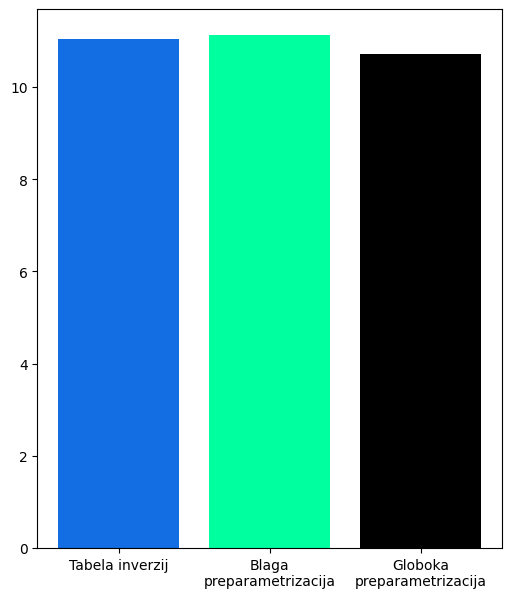

: 

In [ ]:
import matplotlib.pyplot as plt
from gofi.plot import colors as gc

methods, losses = zip(*average_losses.items())

labels  = {
    "vanilla_it": "Tabela inverzij",
    "mild_nn_it": "Blaga\npreparametrizacija",
    "nn_it": "Globoka\npreparametrizacija",
}

plt.figure(figsize=(6,7))
plt.bar([labels[method] for method in methods], losses, color = [gc.graph_comparisons[method] for method in methods], fill=True, lw=3, width=0.8)

In [ ]:
import numpy as np

imax = np.argmax([results["graph_tuple"][0].shape[0] for results in lor])
lor[imax]["nn_it"]["final_loss"], lor[imax]["mild_nn_it"]["final_loss"], lor[imax]["vanilla_it"]["final_loss"]

(0.25000014901161194, 0.25000280141830444, 0.2500162124633789)

: 